In [1]:
import pandas as pd
import numpy as np
# words preprocesing
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
# for vizualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# for classification
from sklearn.model_selection import train_test_split
ffrom sklearn.metrics import classification_report,confusion_matrix
# for image 
from sklearn.cluster import KMeans
from PIL import Image
from sklearn.utils import shuffle

In [2]:
## uploading datasets 
fantasy = Image.open("/kaggle/input/dragon/dragon.jpg")
fantasy = np.array(fantasy, dtype=np.float64) / 255

In [3]:
# preprocecing image 
w, h, d = original_shape = tuple(fantasy.shape)
image_array = np.reshape(fantasy, (w * h, d))
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
# k-means 
kmeans8 = KMeans(n_clusters=8, random_state=0).fit(image_array_sample)
kmeans16 = KMeans(n_clusters=16, random_state=0).fit(image_array_sample)
kmeans32 = KMeans(n_clusters=32, random_state=0).fit(image_array_sample)
kmeans64 = KMeans(n_clusters=64, random_state=0).fit(image_array_sample)
labels8 = kmeans8.predict(image_array)
labels16 = kmeans16.predict(image_array)
labels32 =  kmeans32.predict(image_array)
labels64 = kmeans64.predict(image_array)

def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

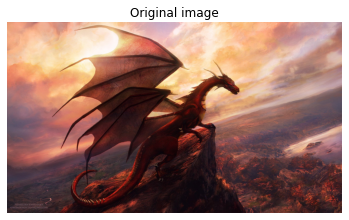

In [4]:
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image")
plt.imshow(fantasy)

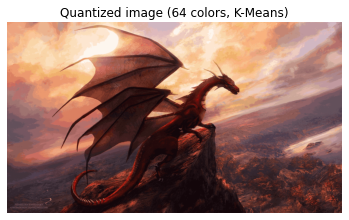

In [5]:
plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({64} colors, K-Means)")
plt.imshow(recreate_image(kmeans64.cluster_centers_, labels64, w, h))

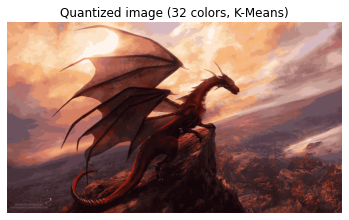

In [6]:
plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({32} colors, K-Means)")
plt.imshow(recreate_image(kmeans32.cluster_centers_, labels32, w, h))

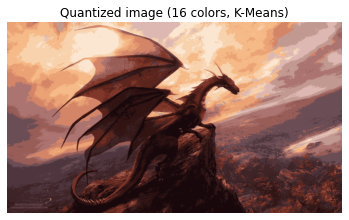

In [7]:
plt.figure(4)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({16} colors, K-Means)")
plt.imshow(recreate_image(kmeans16.cluster_centers_, labels16, w, h))

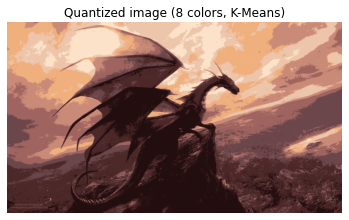

In [8]:
plt.figure(5)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({8} colors, K-Means)")
plt.imshow(recreate_image(kmeans8.cluster_centers_, labels8, w, h))